In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
df = pd.read_excel('E:/1.DATA_SCIENCE/ML assesment/Round 1 Assignment/sales_data.xlsx')

In [3]:
df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [4]:
df.shape

(5000, 40)

In [5]:
# For RFM analysis restructuring the table 

df1 = df[['CustomerID','TOTAL_ORDERS','REVENUE','AVERAGE_ORDER_VALUE','FIRST_ORDER_DATE','LATEST_ORDER_DATE','AVGDAYSBETWEENORDERS','DAYSSINCELASTORDER']]


df1.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER
0,22,124,11986.54,96.67,2016-12-30,2021-10-24,14.19,1
1,29,82,11025.96,134.46,2018-03-31,2021-10-24,15.89,1
2,83,43,7259.69,168.83,2017-11-30,2021-10-24,33.12,1
3,95,44,6992.27,158.92,2019-04-09,2021-10-24,21.11,1
4,124,55,6263.44,113.88,2020-10-23,2021-10-24,6.65,1


In [6]:
#Checking schema

df1.dtypes

CustomerID                       int64
TOTAL_ORDERS                     int64
REVENUE                        float64
AVERAGE_ORDER_VALUE            float64
FIRST_ORDER_DATE        datetime64[ns]
LATEST_ORDER_DATE       datetime64[ns]
AVGDAYSBETWEENORDERS           float64
DAYSSINCELASTORDER               int64
dtype: object

In [7]:
#Checking null values

df1.isnull().sum()

CustomerID              0
TOTAL_ORDERS            0
REVENUE                 0
AVERAGE_ORDER_VALUE     0
FIRST_ORDER_DATE        0
LATEST_ORDER_DATE       0
AVGDAYSBETWEENORDERS    0
DAYSSINCELASTORDER      0
dtype: int64

In [8]:
#checking for duplicates for customer id so thatcustomer id may not exist more then once.

df1['CustomerID'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: CustomerID, Length: 5000, dtype: bool

In [9]:
# Validating data by checking for -ve values in REVENUE

df1.REVENUE.min()


38.5

In [10]:
# Validating data by checking for -ve values in TOTAL_ORDERS

df1.TOTAL_ORDERS.min()

1

In [11]:
# Validating data by checking for -ve values in AVGDAYSBETWEENORDERS

df1.AVGDAYSBETWEENORDERS.min()


0.0

In [12]:
# Validating data by checking for -ve values in DAYSSINCELASTORDER

df1.DAYSSINCELASTORDER.min()

1

In [13]:
# Checking the correlation within the parameters

df1.corr(method= 'pearson')

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER
CustomerID,1.000000,-0.608092,-0.556489,-0.226023,0.279182,0.375343
TOTAL_ORDERS,-0.608092,1.000000,0.771996,-0.065208,-0.311838,-0.256272
REVENUE,-0.556489,0.771996,1.000000,0.366302,-0.257746,-0.197782
AVERAGE_ORDER_VALUE,-0.226023,-0.065208,0.366302,1.000000,-0.088756,-0.061769
AVGDAYSBETWEENORDERS,0.279182,-0.311838,-0.257746,-0.088756,1.000000,0.054743
DAYSSINCELASTORDER,0.375343,-0.256272,-0.197782,-0.061769,0.054743,1.000000


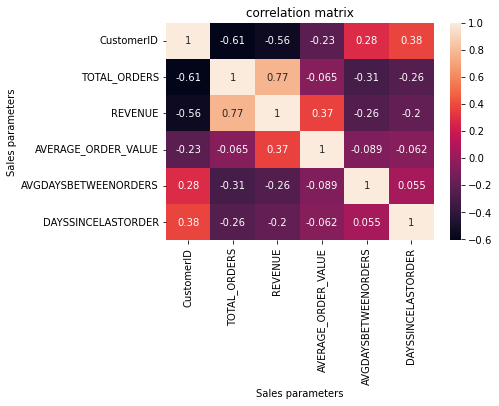

In [14]:
correlation_matrix = df1.corr(method ='pearson')

sns.heatmap(correlation_matrix,annot=True)
plt.title("correlation matrix")
plt.xlabel("Sales parameters")
plt.ylabel("Sales parameters")

plt.show()

this heatmap shows that the most high correlated matrix between TOTAL_ORDERS and REVENUE   

### Modelling data using RFM model


Recency = days since last order ( 'days the customer has last reached ')

Frequency = total order

Monetary = revenue



In [15]:
RFM = df1[['CustomerID','DAYSSINCELASTORDER','TOTAL_ORDERS','REVENUE']]

RFM.rename(columns={'DAYSSINCELASTORDER': 'Recency', 
                                   'TOTAL_ORDERS': 'Frequency', 
                                        'REVENUE': 'Monetary'}, inplace=True)


C:\Users\30jun\AppData\Local\Temp\ipykernel_10716\3452210110.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
RFM

,CustomerID,Recency,Frequency,Monetary
0,22,1,124,11986.54
1,29,1,82,11025.96
2,83,1,43,7259.69
3,95,1,44,6992.27
4,124,1,55,6263.44
...,...,...,...,...
4995,173946,207,1,117.49
4996,173987,207,1,117.49
4997,174004,207,1,117.49
4998,174038,207,1,117.49


In [17]:
# Checking descriptive stats for the Recency

RFM.Recency.describe()

count    5000.000000
mean       87.420000
std        80.156513
min         1.000000
25%         7.000000
50%        68.000000
75%       171.250000
max       207.000000
Name: Recency, dtype: float64

E:\1.DATA_SCIENCE\Python\anaconda_setup\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



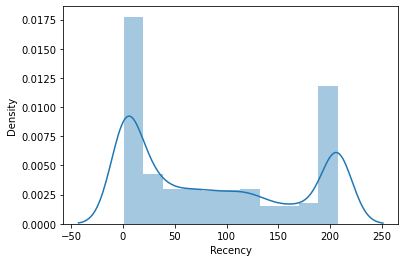

In [18]:
# Recency distribution plot

r = RFM['Recency']

r1 = sns.distplot(r)

In [19]:
# Checking descriptive stats for the Recency

RFM.Frequency.describe()

count    5000.00000
mean       12.87040
std        12.67988
min         1.00000
25%         3.00000
50%         8.00000
75%        20.00000
max       156.00000
Name: Frequency, dtype: float64

E:\1.DATA_SCIENCE\Python\anaconda_setup\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



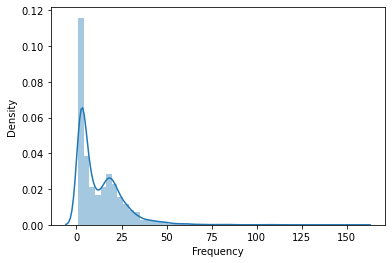

In [20]:
# Recency Frequency plot

f = RFM['Frequency']

f1 = sns.distplot(f)

In [21]:
# Checking descriptive stats for the Monetary

RFM.Monetary.describe()

count     5000.000000
mean      1681.523840
std       1998.618678
min         38.500000
25%        315.097500
50%        966.725000
75%       2493.072500
max      34847.400000
Name: Monetary, dtype: float64

E:\1.DATA_SCIENCE\Python\anaconda_setup\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



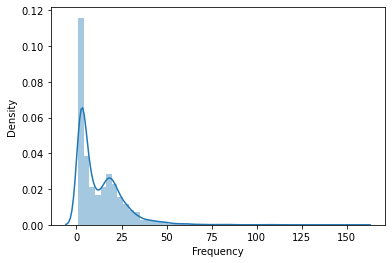

In [22]:
# Recency Descriptive plot

m = RFM['Monetary']

m1 = sns.distplot(f)

In [23]:
# USing Quantiles splitting in quarters

quantiles = RFM.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

quantiles

{'CustomerID': {0.25: 1687.5, 0.5: 13765.0, 0.75: 71891.5},
 'Recency': {0.25: 7.0, 0.5: 68.0, 0.75: 171.25},
 'Frequency': {0.25: 3.0, 0.5: 8.0, 0.75: 20.0},
 'Monetary': {0.25: 315.09749999999997, 0.5: 966.725, 0.75: 2493.0725}}


#### Creating RFM score segments with help of quartiles.

In [24]:
# Lesser the recency will be more the score will be.

# As per correlation we can se Frequency and Monetary are highly correlated therefore there functions will be similar as more the 
#More the Monetary and frequency will be more the score will be


# Function for recency scoring
    
def r_score(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Function for Frequency and monetary scoring
    
def FM_score(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    



In [25]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values

RFM['R'] = RFM['Recency'].apply(r_score, args=('Recency',quantiles,))
RFM['F'] = RFM['Frequency'].apply(FM_score, args=('Frequency',quantiles,))
RFM['M'] = RFM['Monetary'].apply(FM_score, args=('Monetary',quantiles,))


C:\Users\30jun\AppData\Local\Temp\ipykernel_10716\1934018274.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\30jun\AppData\Local\Temp\ipykernel_10716\1934018274.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\30jun\AppData\Local\Temp\ipykernel_10716\1934018274.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [26]:

RFM.head(2400)


,CustomerID,Recency,Frequency,Monetary,R,F,M
0,22,1,124,11986.54,4,4,4
1,29,1,82,11025.96,4,4,4
2,83,1,43,7259.69,4,4,4
3,95,1,44,6992.27,4,4,4
4,124,1,55,6263.44,4,4,4
...,...,...,...,...,...,...,...
2395,8024,61,17,1271.34,3,3,3
2396,9474,61,7,1172.75,3,2,3
2397,30509,61,9,605.07,3,3,2
2398,194315,61,2,99.00,3,1,1


In [27]:
#Calculate and Add RFM Group value column showing combined concatenated score of RFM

RFM['RFM_Group'] = RFM.R.map(str) + RFM.F.map(str) + RFM.M.map(str)

#Calculating and Adding RFM Score value column showing total sum of RFMGroup values

RFM['RFM_Score'] = RFM[['R', 'F', 'M']].sum(axis = 1)
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score
0,22,1,124,11986.54,4,4,4,444,12
1,29,1,82,11025.96,4,4,4,444,12
2,83,1,43,7259.69,4,4,4,444,12
3,95,1,44,6992.27,4,4,4,444,12
4,124,1,55,6263.44,4,4,4,444,12


In [28]:
#Assigning the Loyalty Level to each customer

Loyalty_Level = ['Needs Attention', 'Potential Customers', 'Champions']
Score_cuts = pd.qcut(RFM.RFM_Score, q = 3, labels = Loyalty_Level)
RFM['RFM_Loyalty_Level'] = Score_cuts.values
RFM.reset_index().head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,0,22,1,124,11986.54,4,4,4,444,12,Champions
1,1,29,1,82,11025.96,4,4,4,444,12,Champions
2,2,83,1,43,7259.69,4,4,4,444,12,Champions
3,3,95,1,44,6992.27,4,4,4,444,12,Champions
4,4,124,1,55,6263.44,4,4,4,444,12,Champions


In [29]:
#Validating the data for RFMGroup = 444

RFM[RFM['RFM_Group']=='444'].sort_values('Monetary', ascending=False).reset_index()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,1153,4,5,84,18554.49,4,4,4,444,12,Champions
1,1194,17,6,36,12969.98,4,4,4,444,12,Champions
2,0,22,1,124,11986.54,4,4,4,444,12,Champions
3,1,29,1,82,11025.96,4,4,4,444,12,Champions
4,1154,35,5,32,9685.37,4,4,4,444,12,Champions
...,...,...,...,...,...,...,...,...,...,...,...
115,37,1610,1,22,2534.23,4,4,4,444,12,Champions
116,38,1621,1,21,2530.55,4,4,4,444,12,Champions
117,1258,1627,7,26,2525.70,4,4,4,444,12,Champions
118,1054,1651,2,23,2513.52,4,4,4,444,12,Champions


In [30]:
RFM.dtypes

CustomerID              int64
Recency                 int64
Frequency               int64
Monetary              float64
R                       int64
F                       int64
M                       int64
RFM_Group              object
RFM_Score               int64
RFM_Loyalty_Level    category
dtype: object

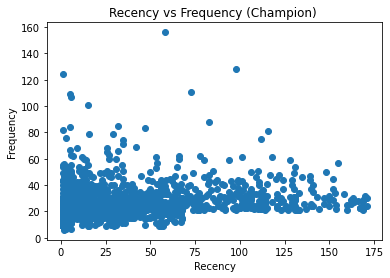

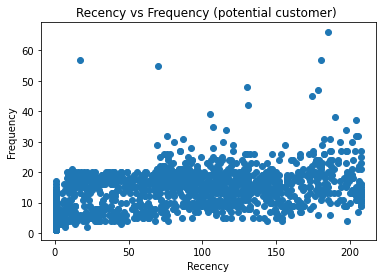

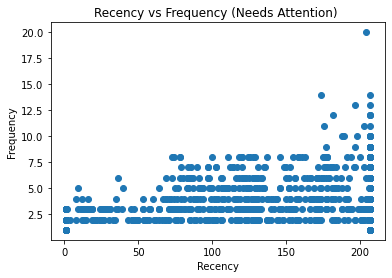

In [31]:
#PLotting a Scatterplot using matplotlib between  Recency and Frequency.


# for Champions catagory

plt.scatter(x=RFM.query("RFM_Loyalty_Level == 'Champions'")['Recency'],y=RFM.query("RFM_Loyalty_Level == 'Champions'")['Frequency'])

plt.title("Recency vs Frequency (Champion) ")
plt.xlabel('Recency')
plt.ylabel('Frequency')
           
plt.show()


# for Potential Customers catagory

plt.scatter(x=RFM.query("RFM_Loyalty_Level == 'Potential Customers'")['Recency'],y=RFM.query("RFM_Loyalty_Level == 'Potential Customers'")['Frequency'])

plt.title("Recency vs Frequency (potential customer) ")
plt.xlabel('Recency')
plt.ylabel('Frequency')
           
plt.show()


# for Needs Attention catagory

plt.scatter(x=RFM.query("RFM_Loyalty_Level == 'Needs Attention'")['Recency'],y=RFM.query("RFM_Loyalty_Level == 'Needs Attention'")['Frequency'])

plt.title("Recency vs Frequency (Needs Attention) ")
plt.xlabel('Recency')
plt.ylabel('Frequency')
           
plt.show()




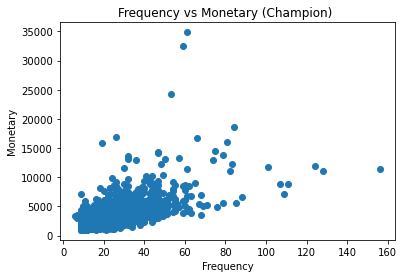

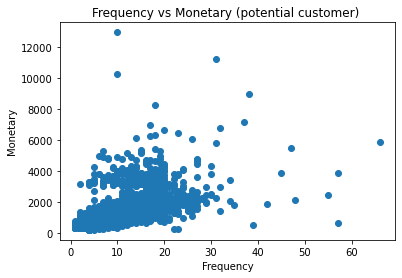

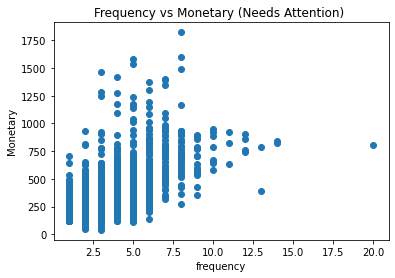

In [32]:
#PLotting a Scatterplot using matplotlib between Frequency Vs Monetary.


# for Champions catagory

plt.scatter(x=RFM.query("RFM_Loyalty_Level == 'Champions'")['Frequency'],y=RFM.query("RFM_Loyalty_Level == 'Champions'")['Monetary'])

plt.title("Frequency vs Monetary (Champion) ")
plt.xlabel('Frequency')
plt.ylabel('Monetary')
           
plt.show()


# for Potential Customers catagory

plt.scatter(x=RFM.query("RFM_Loyalty_Level == 'Potential Customers'")['Frequency'],y=RFM.query("RFM_Loyalty_Level == 'Potential Customers'")['Monetary'])

plt.title("Frequency vs Monetary (potential customer) ")
plt.xlabel('Frequency')
plt.ylabel('Monetary')
           
plt.show()


# for Needs Attention catagory

plt.scatter(x=RFM.query("RFM_Loyalty_Level == 'Needs Attention'")['Frequency'],y=RFM.query("RFM_Loyalty_Level == 'Needs Attention'")['Monetary'])

plt.title("Frequency vs Monetary (Needs Attention) ")
plt.xlabel('frequency')
plt.ylabel('Monetary')
           
plt.show()

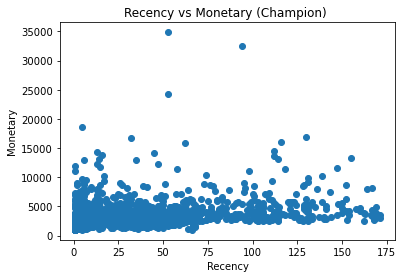

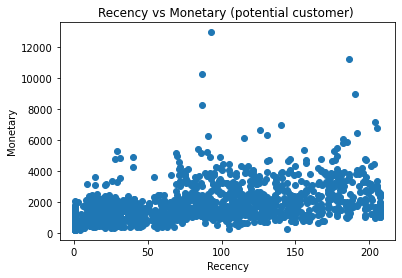

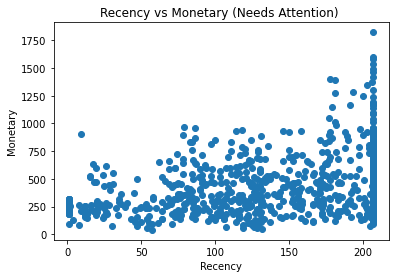

In [33]:
#PLotting a Scatterplot using matplotlib between  Recency vs Monetary .


# for Champions catagory

plt.scatter(x=RFM.query("RFM_Loyalty_Level == 'Champions'")['Recency'],y=RFM.query("RFM_Loyalty_Level == 'Champions'")['Monetary'])

plt.title("Recency vs Monetary (Champion) ")
plt.xlabel('Recency')
plt.ylabel('Monetary')
           
plt.show()


# for Potential Customers catagory

plt.scatter(x=RFM.query("RFM_Loyalty_Level == 'Potential Customers'")['Recency'],y=RFM.query("RFM_Loyalty_Level == 'Potential Customers'")['Monetary'])

plt.title("Recency vs Monetary (potential customer) ")
plt.xlabel('Recency')
plt.ylabel('Monetary')
           
plt.show()


# for Needs Attention catagory

plt.scatter(x=RFM.query("RFM_Loyalty_Level == 'Needs Attention'")['Recency'],y=RFM.query("RFM_Loyalty_Level == 'Needs Attention'")['Monetary'])

plt.title("Recency vs Monetary (Needs Attention) ")
plt.xlabel('Recency')
plt.ylabel('Monetary')
           
plt.show()

## Plotting the scatter plot to see the combined spread of categories

In [36]:


#Recency Vs Frequency

# Champions
plot1 = [
    gobj.Scatter(
        x=RFM.query("RFM_Loyalty_Level == 'Champions'")['Recency'],
        y=RFM.query("RFM_Loyalty_Level == 'Champions'")['Frequency'],
        mode='markers',
        name='Champions',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=RFM.query("RFM_Loyalty_Level == 'Potential Customers'")['Recency'],
        y=RFM.query("RFM_Loyalty_Level == 'Potential Customers'")['Frequency'],
        mode='markers',
        name='Potential Customers',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=RFM.query("RFM_Loyalty_Level == 'Needs Attention'")['Recency'],
        y=RFM.query("RFM_Loyalty_Level == 'Needs Attention'")['Frequency'],
        mode='markers',
        name='Needs Attention',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot1, layout=plot_layout)
po.iplot(fig)

#Frequency Vs Monetary

plot2 = [
    gobj.Scatter(
        x=RFM.query("RFM_Loyalty_Level == 'Champions'")['Frequency'],
        y=RFM.query("RFM_Loyalty_Level == 'Champions'")['Monetary'],
        mode='markers',
        name='Champions',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=RFM.query("RFM_Loyalty_Level == 'Potential Customers'")['Frequency'],
        y=RFM.query("RFM_Loyalty_Level == 'Potential Customers'")['Monetary'],
        mode='markers',
        name='Potential Customers',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=RFM.query("RFM_Loyalty_Level == 'Needs Attention'")['Frequency'],
        y=RFM.query("RFM_Loyalty_Level == 'Needs Attention'")['Monetary'],
        mode='markers',
        name='Needs Attention',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot2, layout=plot_layout)
po.iplot(fig)

#Recency Vs Monetary


plot3 = [
    gobj.Scatter(
        x=RFM.query("RFM_Loyalty_Level == 'Champions'")['Recency'],
        y=RFM.query("RFM_Loyalty_Level == 'Champions'")['Monetary'],
        mode='markers',
        name='Champions',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=RFM.query("RFM_Loyalty_Level == 'Potential Customers'")['Recency'],
        y=RFM.query("RFM_Loyalty_Level == 'Potential Customers'")['Monetary'],
        mode='markers',
        name='Potential Customers',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=RFM.query("RFM_Loyalty_Level == 'Needs Attention'")['Recency'],
        y=RFM.query("RFM_Loyalty_Level == 'Needs Attention'")['Monetary'],
        mode='markers',
        name='Needs Attention',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
   
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot3, layout=plot_layout)
po.iplot(fig)

## K - means Clustering

In [40]:
#Handling the negative and zero values so as to handle infinite numbers during log transformation.

def neg_zero_handling(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 

RFM['Recency'] = [neg_zero_handling(x) for x in RFM.Recency]
RFM['Monetary'] = [neg_zero_handling(x) for x in RFM.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution

Log_transf = RFM[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

E:\1.DATA_SCIENCE\Python\anaconda_setup\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



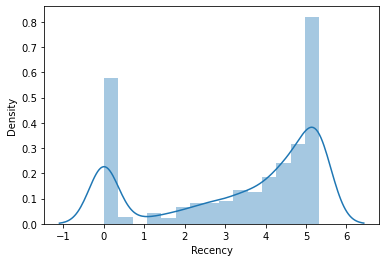

In [43]:
#Data distribution after data normalization for Recency

Recency_Plot = Log_transf['Recency']
a1 = sns.distplot(Recency_Plot)

E:\1.DATA_SCIENCE\Python\anaconda_setup\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



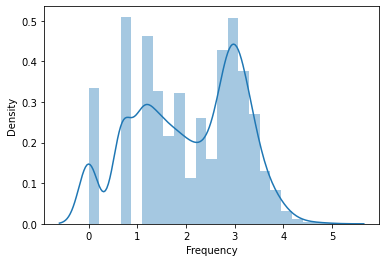

In [44]:
#Data distribution after data normalization for Frequency

Frequency_Plot = Log_transf['Frequency']
ax = sns.distplot(Frequency_Plot)

E:\1.DATA_SCIENCE\Python\anaconda_setup\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



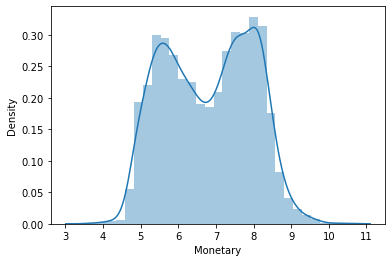

In [46]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_transf['Monetary']
ax = sns.distplot(Monetary_Plot)

In [48]:
#Bringing the data on same scale

scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_transf)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFM.index, columns = Log_transf.columns)



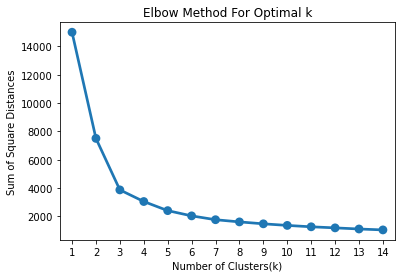

In [49]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters

sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [58]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFM['Cluster'] = KMean_clust.labels_
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Cluster,Color
0,22,1,124,11986.54,4,4,4,444,12,Champions,0,red
1,29,1,82,11025.96,4,4,4,444,12,Champions,0,red
2,83,1,43,7259.69,4,4,4,444,12,Champions,0,red
3,95,1,44,6992.27,4,4,4,444,12,Champions,0,red
4,124,1,55,6263.44,4,4,4,444,12,Champions,0,red


<Figure size 504x504 with 0 Axes>

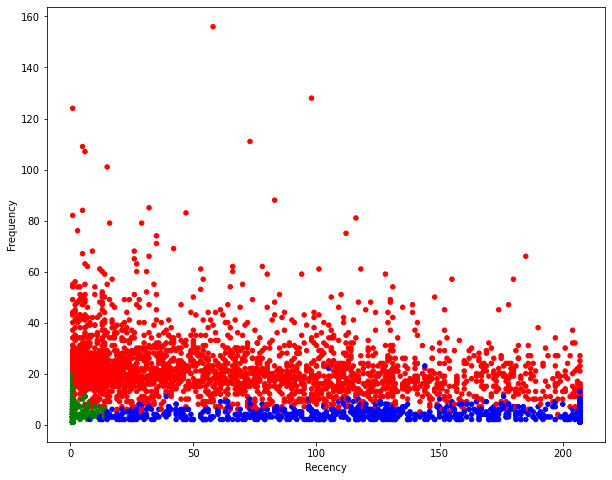

In [67]:

plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFM['Color'] = RFM['Cluster'].map(lambda p: Colors[p])
ax = RFM.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFM['Color']
)

In [66]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Cluster,Color
0,22,1,124,11986.54,4,4,4,444,12,Champions,0,red
1,29,1,82,11025.96,4,4,4,444,12,Champions,0,red
2,83,1,43,7259.69,4,4,4,444,12,Champions,0,red
3,95,1,44,6992.27,4,4,4,444,12,Champions,0,red
4,124,1,55,6263.44,4,4,4,444,12,Champions,0,red


In [68]:
RFM.to_csv('E:/1.DATA_SCIENCE/RFM.csv', index=False)